In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"mini_project_dataset_1.csv")

In [3]:
df.shape

(16, 2)

In [4]:
df

,Accuracy (%),Avg. Reaction Time (s)
0,66.7,1.91
1,76.4,1.41
2,95.3,1.89
3,74.2,1.22
4,70.8,1.35
5,92.8,1.34
6,98.2,1.29
7,68.9,1.48
8,97.6,2.12
9,63.5,1.27


In [5]:
df.describe()

,Accuracy (%),Avg. Reaction Time (s)
count,16.000000,16.000000
mean,83.131250,1.661250
std,13.717372,0.345367
min,63.500000,1.220000
25%,70.425000,1.347500
50%,84.600000,1.620000
75%,95.650000,1.950000
max,100.000000,2.180000


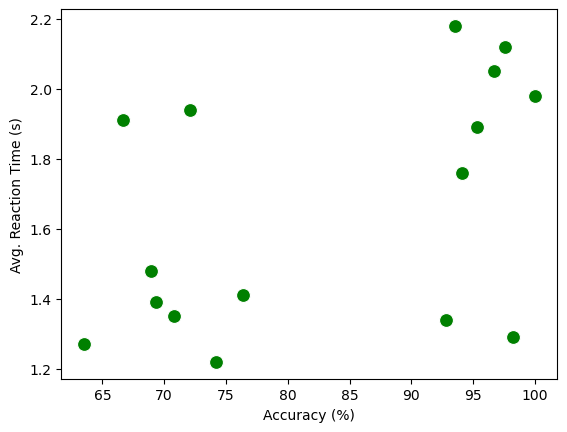

In [14]:
sns.scatterplot(data=df,x=df['Accuracy (%)'],y=df['Avg. Reaction Time (s)'] ,color='green', s=100)
plt.savefig("scatterplot.png")

In [7]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2,random_state=42)
kmean.fit(df) 
label = kmean.labels_
centroid = kmean.cluster_centers_

In [8]:
print(label)
print(centroid)

[1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0]
[[96.025    1.82625]
 [70.2375   1.49625]]


In [9]:
df['label'] = label

In [10]:
df

,Accuracy (%),Avg. Reaction Time (s),label
0,66.7,1.91,1
1,76.4,1.41,1
2,95.3,1.89,0
3,74.2,1.22,1
4,70.8,1.35,1
5,92.8,1.34,0
6,98.2,1.29,0
7,68.9,1.48,1
8,97.6,2.12,0
9,63.5,1.27,1


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



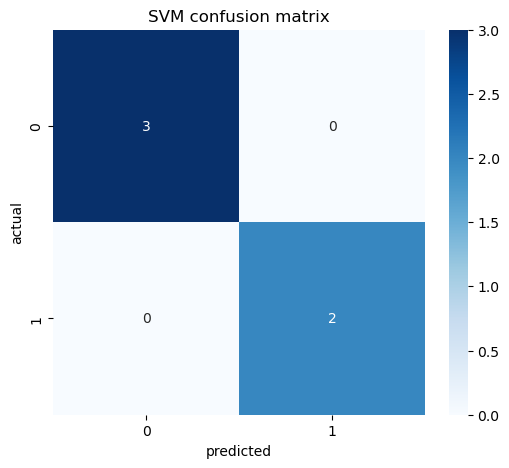

In [11]:
# apply support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
X = df.drop('label',axis=1)
y = df['label']
# print(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# print(X_train)
SVM = SVC(kernel='linear')
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_test,y_pred))
CONFUSION_MATRIX = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(CONFUSION_MATRIX,annot=True,cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("SVM confusion matrix")
# plt.savefig("SVM_confusion_matrix.png")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



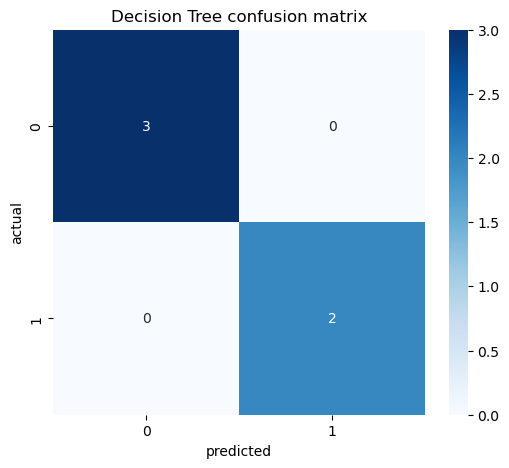

In [12]:
from sklearn.tree import DecisionTreeClassifier
X = df.drop('label',axis=1)
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

decisionTreeModel = DecisionTreeClassifier(random_state=42)
decisionTreeModel.fit(X_train,y_train)
y_pred = decisionTreeModel.predict(X_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("Decision Tree confusion matrix")
# plt.savefig("Decision_Tree_confusion_matrix.png")
plt.show()

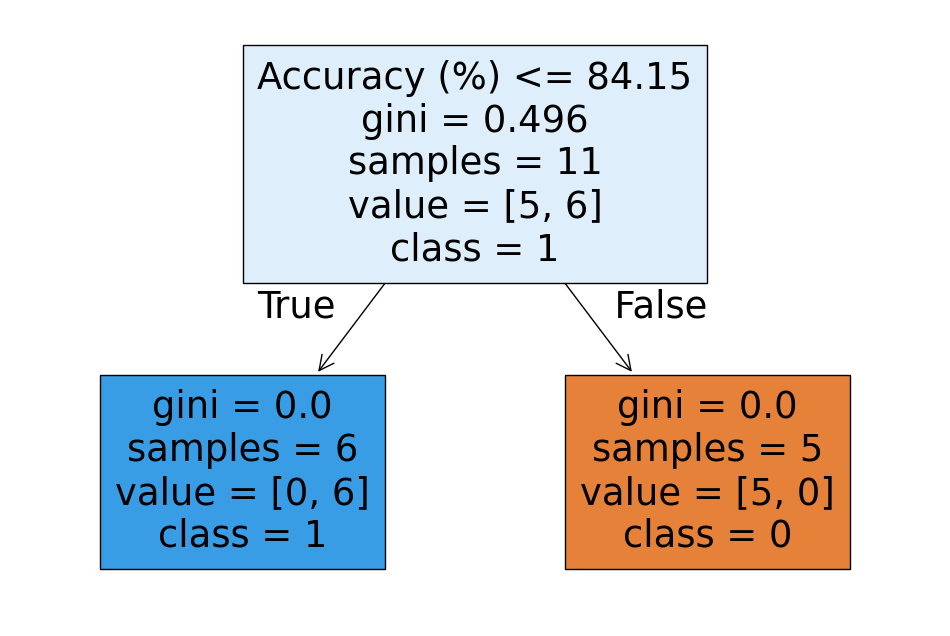

In [13]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(decisionTreeModel,feature_names=X.columns,class_names=[str(c) for c in decisionTreeModel.classes_],filled=True)
plt.show()